# Lab 1
#### Name: Asha M Silva 
#### Date: March 3, 2021

# Introduction 


## Review of Discussion Paper

El Nino Southern Oscillation (ENSO) can significantly impact climate patterns globally and subsequently impact public health. For example, the El Niño event of 2015/2016 not only affected 60 million people worldwide but also contributed to outbreaks of zika, cholera, dengue and hanta plague. Between 1998 and 2017, 1.3 million people died from natural disasters and 4.4 billion people were affected through consequences of the disasters. These consequences include, but are not limited to, undernutrition, mental health injury, and poor hygiene. The objective of this study is to investigate whether global, regional, and country-level rates of people affected by natural disasters (PAD) are linked to ENSO. The study was conducted by recording annual number of PAD between 1964-2017 recorded on EM-DAT disaster database and UN population data. Time regression studies were then used to assess de-trended associations between PAD and the two most commonly used ENSO indices - Oceanic Nino index (ONI) and multivariate El Niño index (MEI). Results were broken into the following categories: descriptive statistics and global/regional/country analysis. Overall, 7.8 billion people were affected by natural disasters globally with floods, droughts and storms accounting for 95% of cases. 75% of affected people live in Asia. Globally, drought related PAD rate rose sharply in El Niño years while regionally, flood events were most strongly associated. By studying the ENSO cycles and their impact on disaster health related burdens, nations can better prepare & implement risk reduction strategies. (Lam, Haines, McGregor, Chan, &amp; Hajat, 2019)

## Scope and Purpose of this lab

The purpose of this lab is to investigate El Niño trends from 1964 to 2017 based on data from the National Oceanic and Atmospheric Administration (NOAA), EM-DAT (Database: Em-dat), and World Bank (Population, total). The data from NOAA was the MEI data (MEI timeseries FROM Dec/jan 1940/50 up to the present) and ONI data (Climate Prediction Center). The dates for the ONI data utilized were December, January, and February. The dates for the MEI data utilized were December and January. This data will be used to identify common ENSO trends by utilizing both the MEI and ONI indictors. Additionally, this lab will include a secondary dataset containing information regarding the flow Rates of the Nile River (Durbin & Koopman, 2001). The same time series analysis techniques will be applied to this data to derive infomration regarding its periodic or aperiodic nature and dominent frequency. 

# Methods 

## Import the Libraries Needed

In [56]:
install.packages("tswge")
install.packages("datasets")
library("tswge")
library("datasets")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


## Import the Data 

### Code to import the data

#### 1.1 - ONI Data

In [57]:
# Define the URL, scrub the file name from the URL and download to /tmp
oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/tmp/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

# Read directly to dataframe preserving the header
oni.df <- read.table(oni.file, header = TRUE)
# oni.df

# Turn anomalies into a time series object
oni.ts <- ts(oni.df$ANOM, start = c(1950, 1), frequency = 12)
# plot(oni.ts, main = "Three-month running average of ONI")

#### 1.2 - MEI Data:

In [58]:
# Define the URL, scrub the file name, and download it to /tmp
mei.url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei.name <- tail(unlist(strsplit(mei.url, "/")), n=1)
mei.file <- paste("/tmp/", mei.name, sep="")
download.file(mei.url, mei.file, method = 'auto')

# Read the column names from the data
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^YEAR.*", my.line)
  if (length(a) > 0) {
    my.cols <- unlist(strsplit(my.line, "\\s+"))
  }
}

# Create an empty dataframe
n.cols <- length(my.cols)
mei.df <- data.frame(matrix(ncol = n.cols, nrow = 0))
colnames(mei.df) <- my.cols 
str(mei.df)

# Get all the data lines
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^[0-9].*", my.line)
  if (length(a) > 0) {
    my.data <- unlist(strsplit(my.line, "\\s+"))
    num.data <- length(my.data)
    if (num.data == n.cols) {
      my.values <- c()
      for (d in my.data) {
        my.values <- append(my.values, as.numeric(d))
      }
      mei.df[nrow(mei.df)+1,] = my.values
    }
  }
}

# Slice the dataframe for all rows and not the first column
mei.df[1:10, 2:n.cols]

# Check that it works on the first ten rows
# as.vector(t(mei.df[1:10, 2:n.cols]))

# Convert the last twelve columns into a row-by-row vector
# then feed that into the time series function
mei.ts <- ts(as.vector(t(mei.df[,2:length(my.cols)])), start = c(1950, 1), frequency = 12)

# Plot the data 
# plot(mei.ts, main = "Two-month running average MEI")


'data.frame':	0 obs. of  13 variables:
 $ YEAR  : logi 
 $ DECJAN: logi 
 $ JANFEB: logi 
 $ FEBMAR: logi 
 $ MARAPR: logi 
 $ APRMAY: logi 
 $ MAYJUN: logi 
 $ JUNJUL: logi 
 $ JULAUG: logi 
 $ AUGSEP: logi 
 $ SEPOCT: logi 
 $ OCTNOV: logi 
 $ NOVDEC: logi 


,DECJAN,JANFEB,FEBMAR,MARAPR,APRMAY,MAYJUN,JUNJUL,JULAUG,AUGSEP,SEPOCT,OCTNOV,NOVDEC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.030,-1.133,-1.283,-1.071,-1.434,-1.412,-1.269,-1.042,-0.631,-0.441,-1.151,-1.235
2,-1.049,-1.152,-1.178,-0.511,-0.374,0.288,0.679,0.818,0.726,0.720,0.694,0.504
3,0.433,0.138,0.071,0.224,-0.307,-0.756,-0.305,-0.374,0.310,0.265,-0.351,-0.098
4,0.044,0.401,0.277,0.687,0.756,0.191,0.382,0.209,0.483,0.087,0.078,0.351
5,-0.036,-0.027,0.154,-0.616,-1.465,-1.558,-1.355,-1.456,-1.159,-1.335,-1.124,-1.088
6,-0.740,-0.669,-1.117,-1.621,-1.653,-2.247,-1.976,-2.050,-1.829,-1.738,-1.821,-1.846
7,-1.408,-1.275,-1.371,-1.216,-1.304,-1.523,-1.244,-1.118,-1.350,-1.478,-1.024,-0.993
8,-0.915,-0.348,0.108,0.383,0.813,0.730,0.926,1.132,1.117,1.068,1.138,1.268
9,1.473,1.454,1.313,0.991,0.673,0.812,0.700,0.421,0.171,0.203,0.476,0.691


Persons Affected by Disasters (PAD) Data:

In [59]:
pad.file <- "/tmp/emdat_public.csv"
pad.df.all <- read.csv(pad.file, header=TRUE, skip=6)

# colnames(pad.df.all)

cols.interest <- c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Affected")
pad.df <- pad.df.all[cols.interest]
# pad.df

# Which countries are we dealing with?
# unique(pad.df$ISO)

# How many countries are we dealing with?
# length(unique(pad.df$ISO))

#### 1.3 - Population Totals with PAD Data and PAD per 1000 Data:

In [86]:
wbank.url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank.name <- "world_bank.zip"
wbank.file <- paste("/tmp/", wbank.name, sep="")
download.file(wbank.url, wbank.file)

unzip(zipfile = wbank.file, exdir = "/tmp")

my.file <- ""
for (tmp.file in list.files("/tmp")){
  a <- grep("^API_SP.POP.TOTL.*csv", tmp.file)
  if (length(a) > 0) {
    my.file <- tmp.file
  }
}
print(my.file)

# Add the path back to the file name
wb.file <- paste("/tmp/", my.file, sep="")

wb.df <- read.csv(wb.file, header = TRUE, skip = 4)

colnames(wb.df)

# Which countries are we dealing with?
unique(wb.df$Country.Code)

length(unique(wb.df$Country.Code))


# Loop through each row of our data frame and
# find the matching country and year
# remember that year columns in World Bank start with "X"
# and save the population to the original pad dataframe.
for (i in 1:nrow(pad.df)) {
  # Remember i is the row index in pad.df
  tmp.iso <- pad.df[i, ][['ISO']]
  tmp.year <- pad.df[i, ][['Start.Year']]
  tmp.col <- paste("X", tmp.year, sep="")
  # Match returns "NA" if no match
  a <- match(tmp.iso, wb.df$Country.Code)
  if (!is.na(a)) {
    tmp.pop <- wb.df[,tmp.col][a]
    # We can create new dataframe columns on the fly
    pad.df[i, 'POP'] = tmp.pop
    #print(c(tmp.iso, tmp.year, tmp.pop))
  } else {
    # Make sure to assign missing values, too!
    pad.df[i, 'POP'] = NA
    # print(paste("Could not match", tmp.iso))
  }
}


all_years <- c(1964:2017)
pad_1000 <- c()

for (year in all_years){
  # Calculate the total number of people impacted by disasters in year
  # Filter out any NA rows/cols
  my_pad <- subset(pad.df, Start.Year == year)
  pad_year <- 0
  for (i in 1:nrow(my_pad)){
    if (!is.na(my_pad$Total.Affected[i]) & !is.na(my_pad$POP[i])) {
      my.ta <- my_pad$Total.Affected[i]
      my.tp <- my_pad$POP[i]
      pad_year <- pad_year + my.ta
    }
  }

  # Find the total population of unique counties impacted by disasters for year
  pop <- 0
  for (my.iso in unique(my_pad$ISO)){
    #print(my.iso)
    a <- match(my.iso, my_pad$ISO)
    tmp.pop <- my_pad$POP[a]
    if (!is.na(tmp.pop)) {
      pop <- pop + tmp.pop
    }
  }

  # Calculate (per 1000) PAD for year
  pad_for_year <- pad_year/pop*1000
  pad_1000 <- append(pad_1000, pad_for_year)
}

pad_1000_df <- data.frame (year  = all_years, pad_1000)
pad_1000.ts <- ts(pad_1000_df$pad_1000, start = c(1950, 1), frequency = 12)

pad_1000_vector <- pad_1000_df[,2]

[1] "API_SP.POP.TOTL_DS2_en_csv_v2_2106202.csv"


[1] "Country.Name"   "Country.Code"   "Indicator.Name" "Indicator.Code"
 [5] "X1960"          "X1961"          "X1962"          "X1963"         
 [9] "X1964"          "X1965"          "X1966"          "X1967"         
[13] "X1968"          "X1969"          "X1970"          "X1971"         
[17] "X1972"          "X1973"          "X1974"          "X1975"         
[21] "X1976"          "X1977"          "X1978"          "X1979"         
[25] "X1980"          "X1981"          "X1982"          "X1983"         
[29] "X1984"          "X1985"          "X1986"          "X1987"         
[33] "X1988"          "X1989"          "X1990"          "X1991"         
[37] "X1992"          "X1993"          "X1994"          "X1995"         
[41] "X1996"          "X1997"          "X1998"          "X1999"         
[45] "X2000"          "X2001"          "X2002"          "X2003"         
[49] "X2004"          "X2005"          "X2006"          "X2007"         
[53] "X2008"          "X2009"          "X2010"          "X2011"         
[57] "X2012"          "X2013"          "X2014"          "X2015"         
[61] "X2016"          "X2017"          "X2018"          "X2019"         
[65] "X2020"          "X"

[1] "ABW" "AFG" "AGO" "ALB" "AND" "ARB" "ARE" "ARG" "ARM" "ASM" "ATG" "AUS"
 [13] "AUT" "AZE" "BDI" "BEL" "BEN" "BFA" "BGD" "BGR" "BHR" "BHS" "BIH" "BLR"
 [25] "BLZ" "BMU" "BOL" "BRA" "BRB" "BRN" "BTN" "BWA" "CAF" "CAN" "CEB" "CHE"
 [37] "CHI" "CHL" "CHN" "CIV" "CMR" "COD" "COG" "COL" "COM" "CPV" "CRI" "CSS"
 [49] "CUB" "CUW" "CYM" "CYP" "CZE" "DEU" "DJI" "DMA" "DNK" "DOM" "DZA" "EAP"
 [61] "EAR" "EAS" "ECA" "ECS" "ECU" "EGY" "EMU" "ERI" "ESP" "EST" "ETH" "EUU"
 [73] "FCS" "FIN" "FJI" "FRA" "FRO" "FSM" "GAB" "GBR" "GEO" "GHA" "GIB" "GIN"
 [85] "GMB" "GNB" "GNQ" "GRC" "GRD" "GRL" "GTM" "GUM" "GUY" "HIC" "HKG" "HND"
 [97] "HPC" "HRV" "HTI" "HUN" "IBD" "IBT" "IDA" "IDB" "IDN" "IDX" "IMN" "IND"
[109] "INX" "IRL" "IRN" "IRQ" "ISL" "ISR" "ITA" "JAM" "JOR" "JPN" "KAZ" "KEN"
[121] "KGZ" "KHM" "KIR" "KNA" "KOR" "KWT" "LAC" "LAO" "LBN" "LBR" "LBY" "LCA"
[133] "LCN" "LDC" "LIC" "LIE" "LKA" "LMC" "LMY" "LSO" "LTE" "LTU" "LUX" "LVA"
[145] "MAC" "MAF" "MAR" "MCO" "MDA" "MDG" "MDV" "MEA" "MEX" "MHL" "MIC" "MKD"
[157] "MLI" "MLT" "MMR" "MNA" "MNE" "MNG" "MNP" "MOZ" "MRT" "MUS" "MWI" "MYS"
[169] "NAC" "NAM" "NCL" "NER" "NGA" "NIC" "NLD" "NOR" "NPL" "NRU" "NZL" "OED"
[181] "OMN" "OSS" "PAK" "PAN" "PER" "PHL" "PLW" "PNG" "POL" "PRE" "PRI" "PRK"
[193] "PRT" "PRY" "PSE" "PSS" "PST" "PYF" "QAT" "ROU" "RUS" "RWA" "SAS" "SAU"
[205] "SDN" "SEN" "SGP" "SLB" "SLE" "SLV" "SMR" "SOM" "SRB" "SSA" "SSD" "SSF"
[217] "SST" "STP" "SUR" "SVK" "SVN" "SWE" "SWZ" "SXM" "SYC" "SYR" "TCA" "TCD"
[229] "TEA" "TEC" "TGO" "THA" "TJK" "TKM" "TLA" "TLS" "TMN" "TON" "TSA" "TSS"
[241] "TTO" "TUN" "TUR" "TUV" "TZA" "UGA" "UKR" "UMC" "URY" "USA" "UZB" "VCT"
[253] "VEN" "VGB" "VIR" "VNM" "VUT" "WLD" "WSM" "XKX" "YEM" "ZAF" "ZMB" "ZWE"

[1] 264

#### 1.4 - Additional Dataset - Nile River Flow Rates

In [61]:
nile_flow_data <- Nile
nile_years <- c(1871:1970)
nile_df <- data.frame (Year = nile_years, Flow.Rate = nile_flow_data)
nile.ts <- ts(nile_df$Flow.Rate, start = c(1871, 1), frequency = 12)


### Cleaned and Compiled Data

ONI Data: 
```
oni.df
oni.ts 
oni_filt
```

MEI Data and Plot:

- the first data frame includes years

``` 
mei.df
mei_df_filt
mei.df[1:10, 2:n.cols]
mei.ts
```

Persons Affected by Disasters with Population Data:
```
pad.df
```

PAD per 1000:
```
pad_1000_df
pad_1000.ts
```

Additional Dataset - Nile River Flow Rates:
```
nile_flow_data
nile_years
nile_df 
nile.ts
```

### 1.1 - ONI Data 

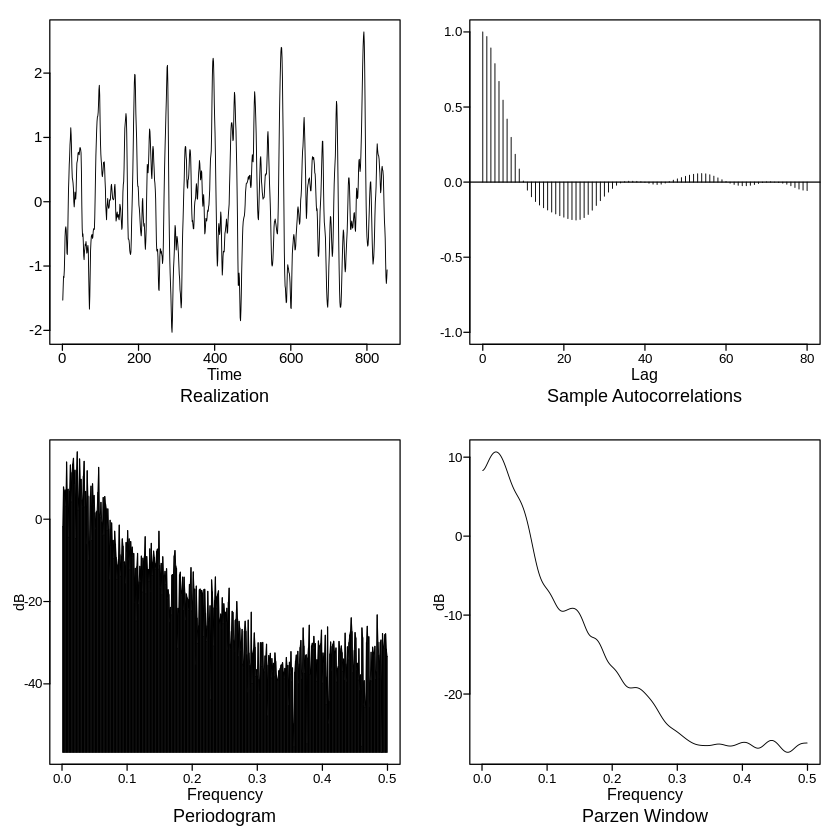

In [62]:
oni.data <- plotts.sample.wge(oni.ts, lag.max = 80)

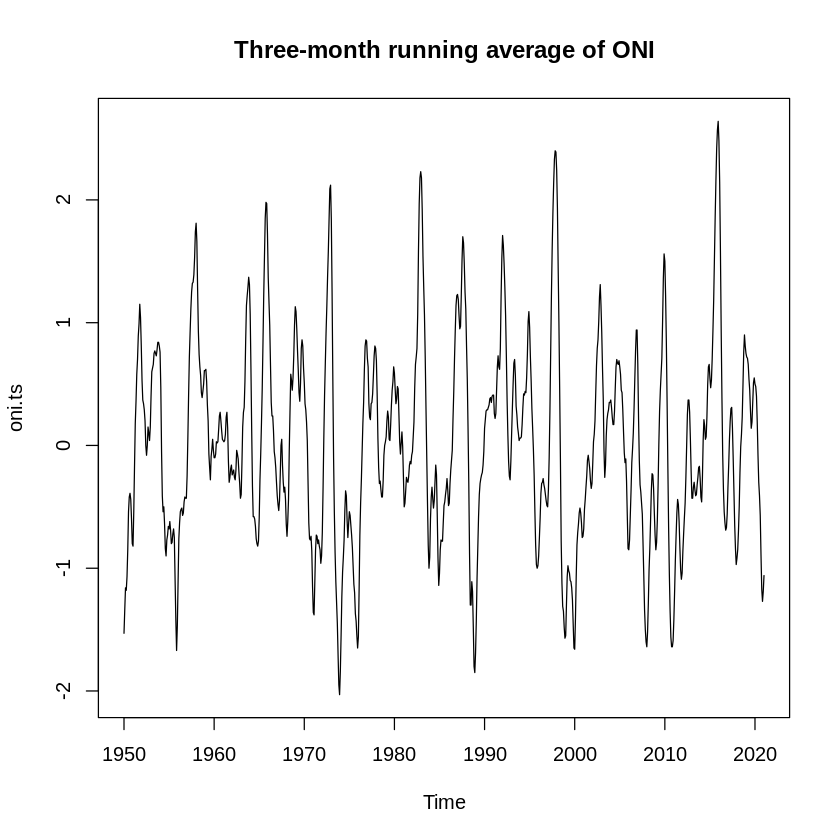

The dominant frequency is:  0.02


Autocorrelations of series ‘oni.ts’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.969  0.893  0.789  0.670  0.546  0.420  0.298  0.185  0.087  0.007 
0.9167 1.0000 1.0833 
-0.053 -0.097 -0.129 

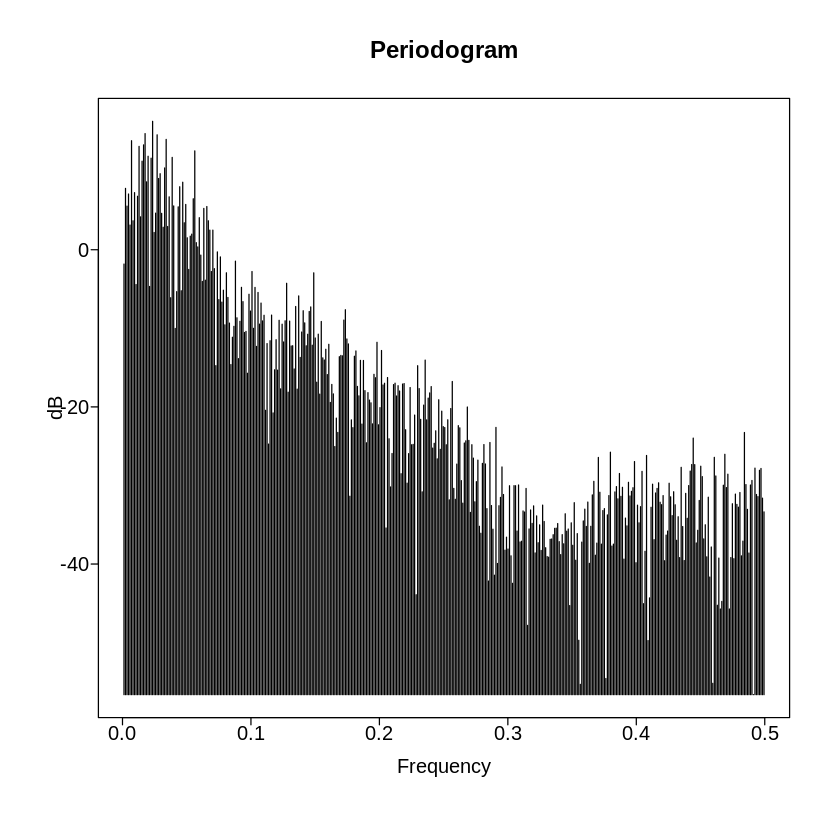

In [63]:
plot(oni.ts, main = "Three-month running average of ONI")

periodogram_oni <- period.wge(oni.ts, dbcalc = TRUE, plot = TRUE)

cat('The dominant frequency is: ', which.max(periodogram_oni$pgram)/1000)

acf(oni.ts, lag.max = 13, plot = FALSE)


### 1.2 - MEI Data

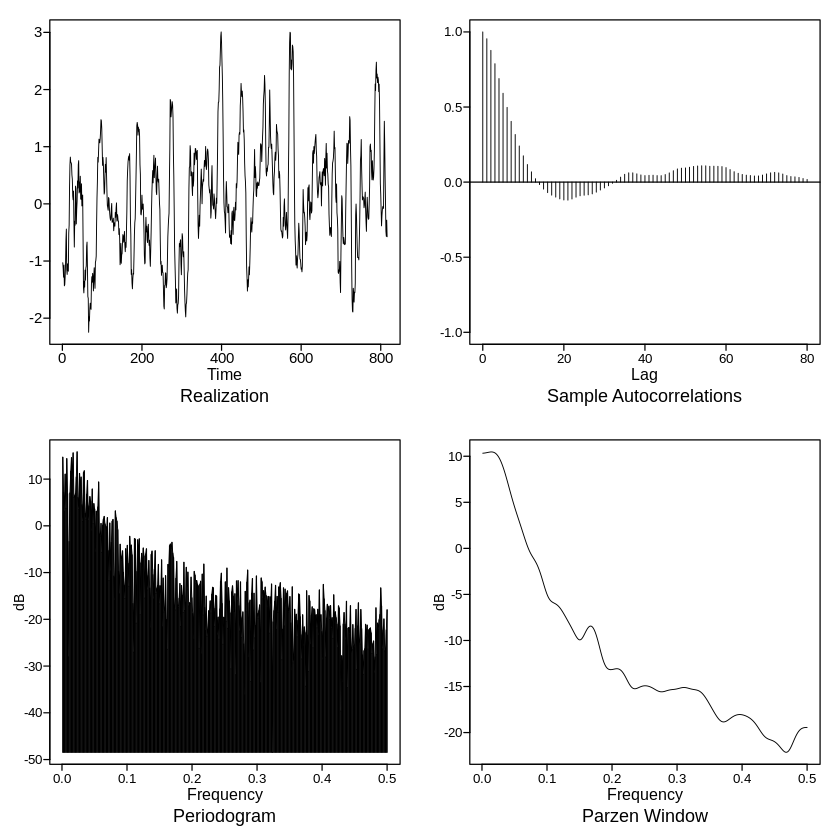

In [64]:
mei.data <- plotts.sample.wge(mei.ts, lag.max = 80)

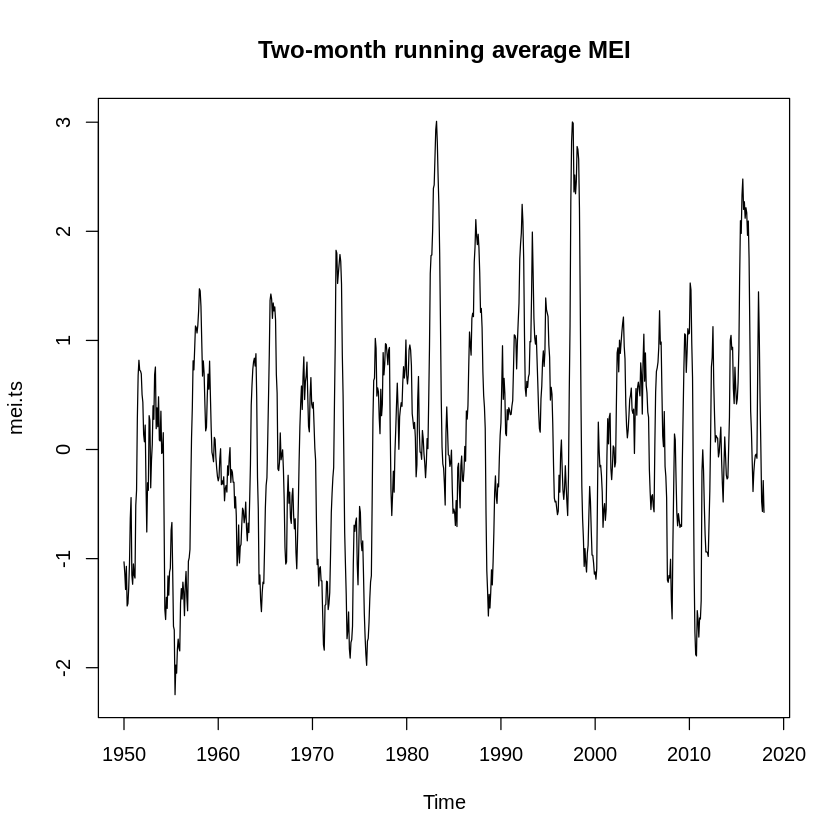

The dominant frequency is:  0.019


Autocorrelations of series ‘mei.ts’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.955  0.877  0.788  0.689  0.592  0.497  0.404  0.317  0.241  0.175 
0.9167 1.0000 1.0833 
 0.117  0.068  0.023 

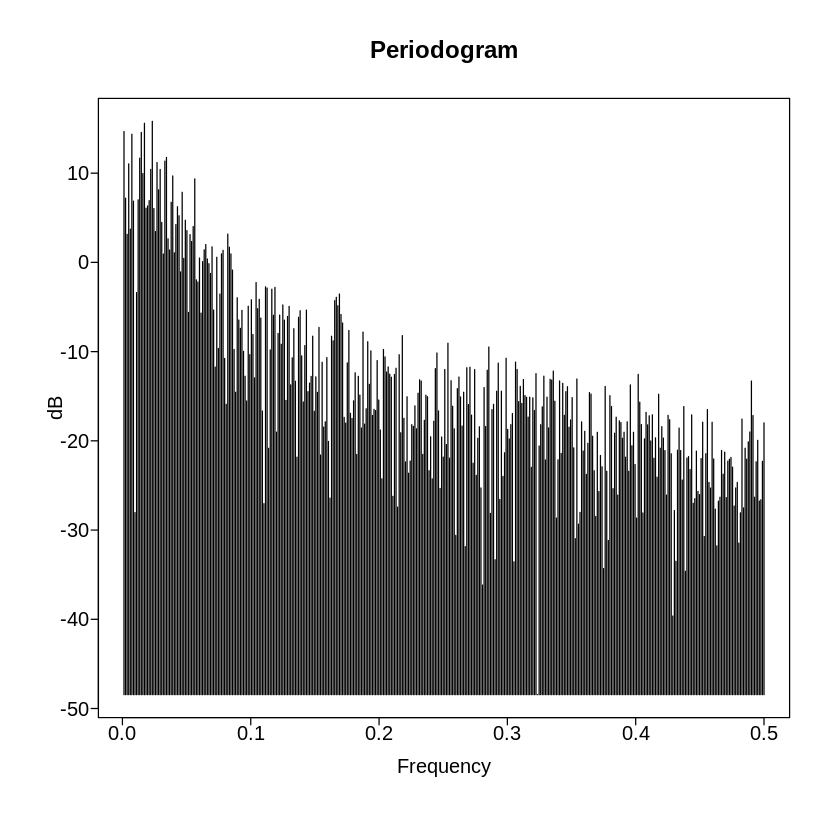

In [65]:
plot(mei.ts, main = "Two-month running average MEI")

periodogram_mei <- period.wge(mei.ts, dbcalc = TRUE, plot = TRUE)

cat('The dominant frequency is: ', which.max(periodogram_mei$pgram)/1000)

acf(mei.ts, lag.max = 13, plot = FALSE)

### 1.3 - PAD per 1000 Data

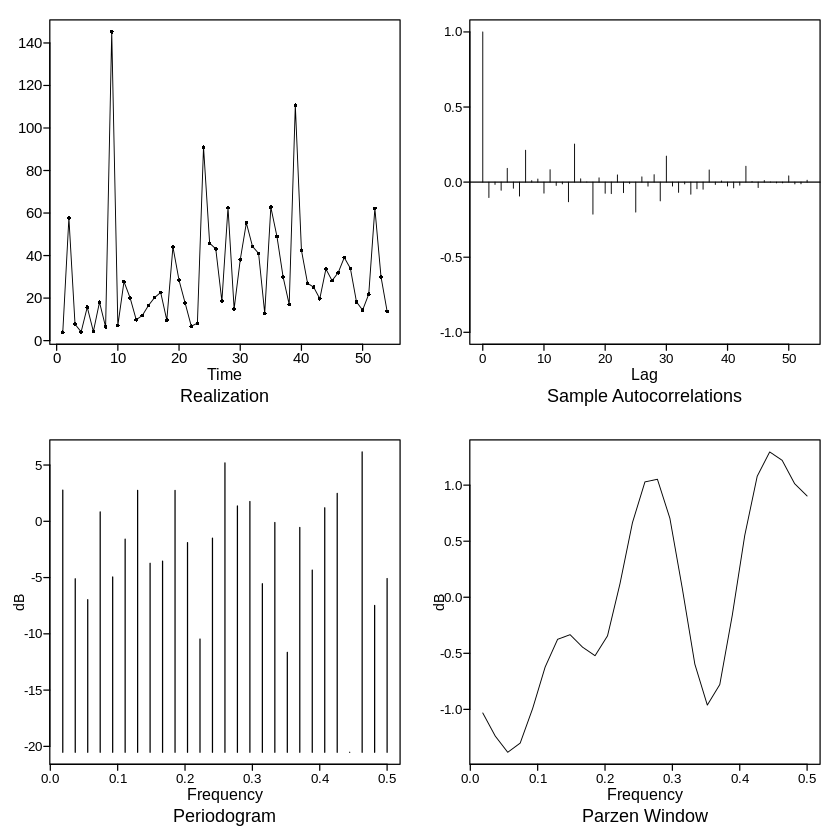

In [66]:
pad.data <- plotts.sample.wge(pad_1000.ts, lag.max = 80)

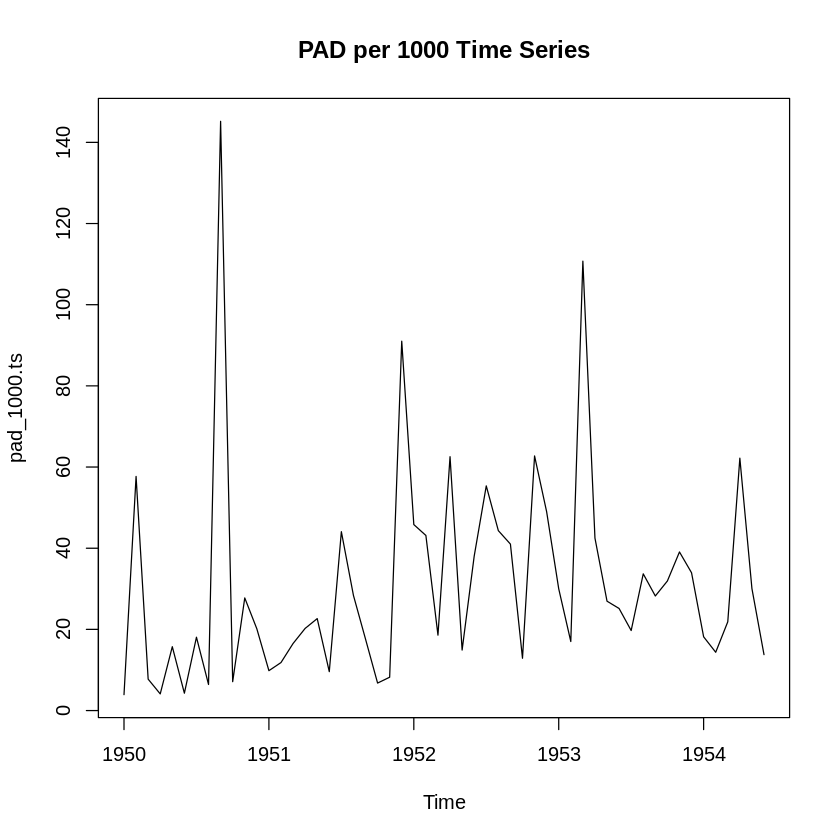

The dominant frequency is:  0.025


Autocorrelations of series ‘pad_1000.ts’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.103 -0.016 -0.054  0.092 -0.041 -0.093  0.212  0.010  0.021 -0.073 
0.9167 1.0000 1.0833 
 0.083 -0.022 -0.012 

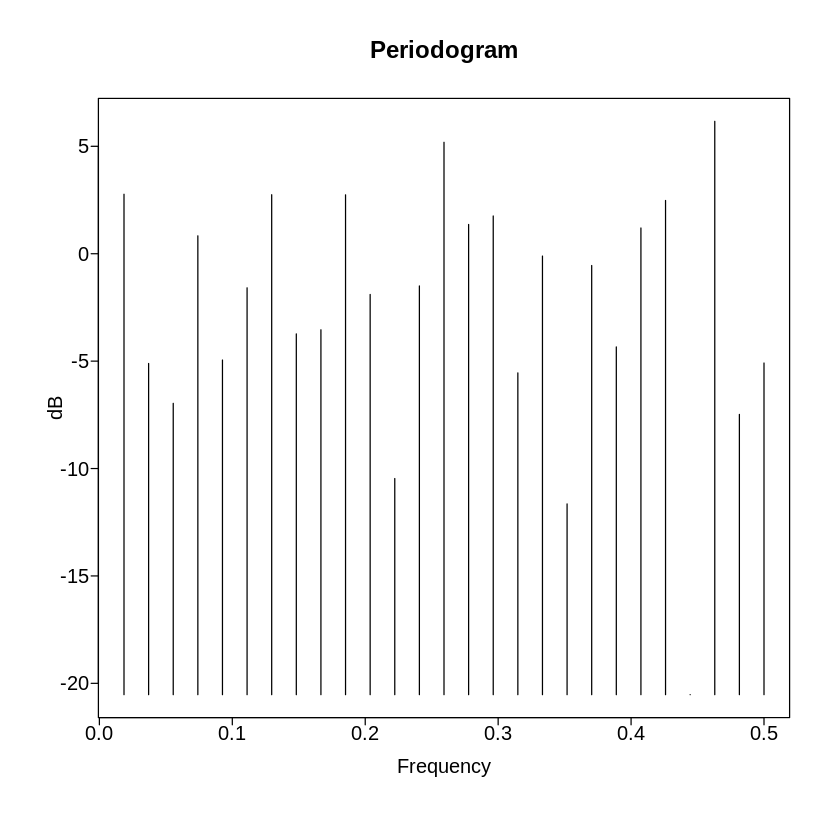

In [67]:
plot(pad_1000.ts, main = "PAD per 1000 Time Series")

periodogram_pad <- period.wge(pad_1000.ts, dbcalc = TRUE, plot = TRUE)

cat('The dominant frequency is: ', which.max(periodogram_pad$pgram)/1000)

acf(pad_1000.ts, lag.max = 13, plot = FALSE)

### 1.4 - Additional Dataset - Nile River Flow Rates

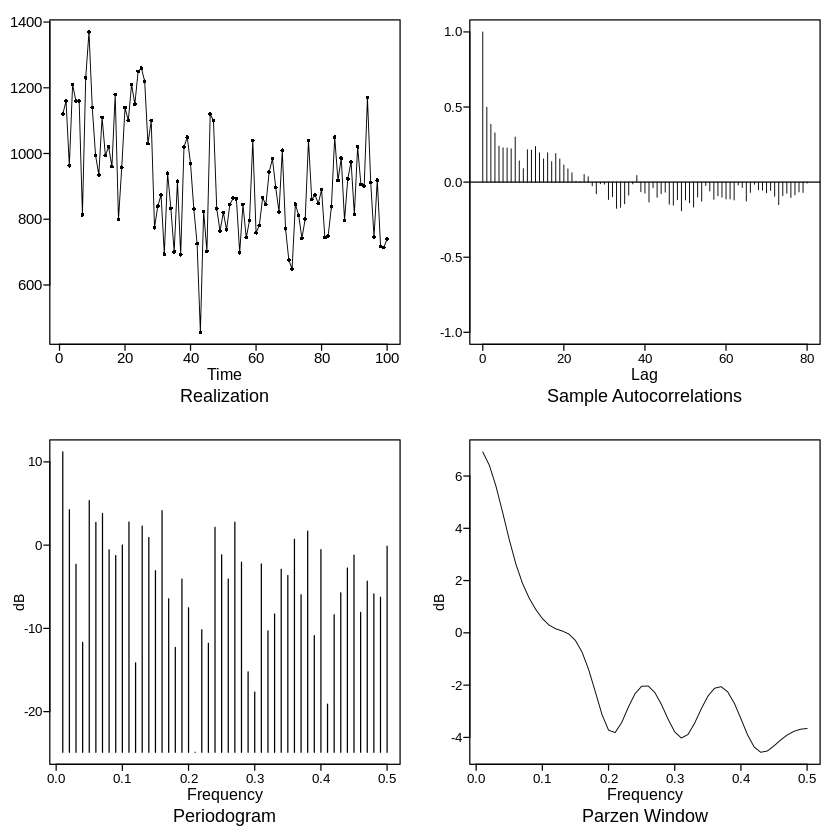

In [68]:
nile.data <- plotts.sample.wge(nile.ts, lag.max = 80)

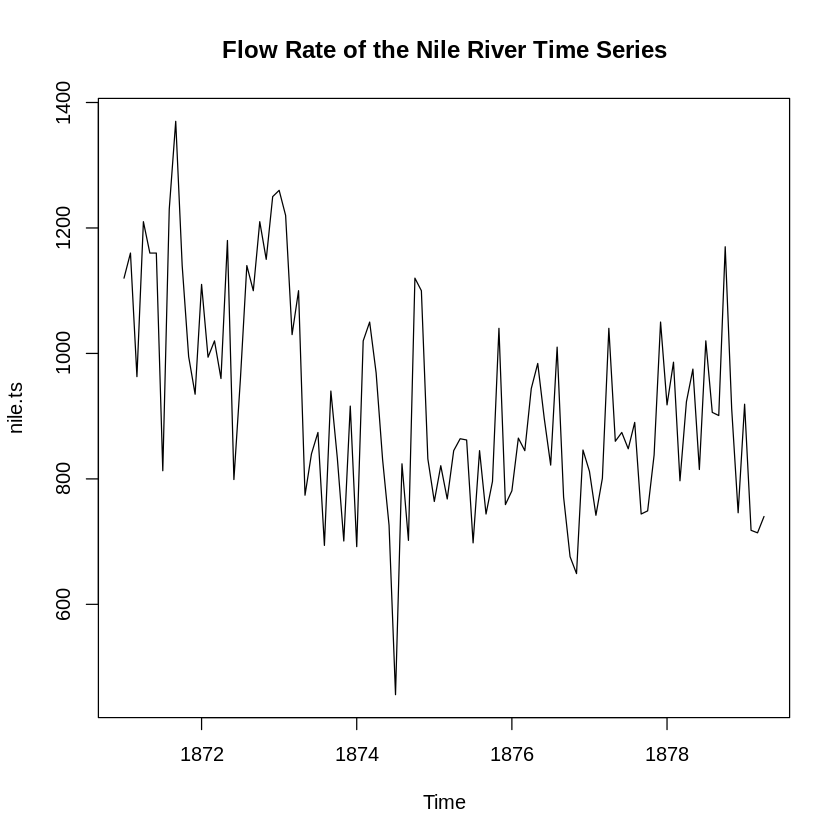

The dominant frequency is:  0.001


Autocorrelations of series ‘nile.ts’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.498  0.385  0.328  0.239  0.228  0.227  0.222  0.300  0.142  0.090 
0.9167 1.0000 1.0833 
 0.215  0.213  0.237 

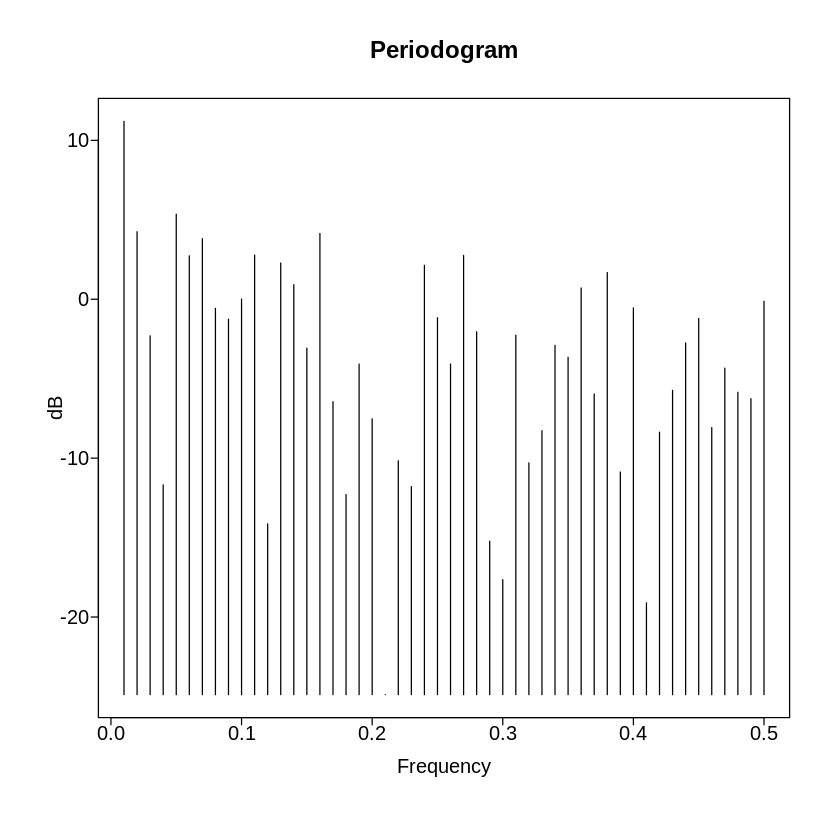

In [69]:
plot(nile.ts, main = "Flow Rate of the Nile River Time Series")

periodogram_nile <- period.wge(nile.ts, dbcalc = TRUE, plot = TRUE)

cat('The dominant frequency is: ', which.max(periodogram_nile$pgram)/1000)

acf(nile.ts, lag.max = 13, type = 'correlation', plot = FALSE)

### Code to Find El Niño Years

Based on ONI:

The dominant ONI El Niño frequency based on ONI is:  0.009

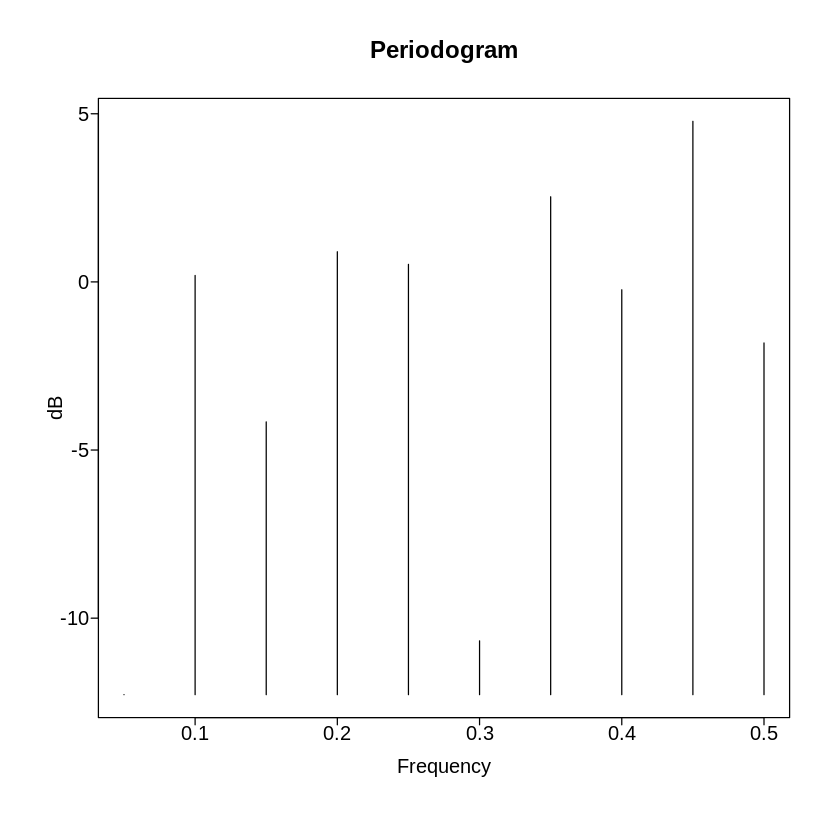

In [70]:
oni_filt <- subset(oni.df, SEAS == 'DJF')
oni_filt <- subset(oni_filt, YR >= 1964 & YR < 2018)

oni_filt_nino <- subset(oni_filt, ANOM >= 0.5)
oni_filt_nino.ts <- ts(oni_filt_nino$ANOM, start = c(1950, 1), frequency = 12)

periodogram_oni_nino <- period.wge(oni_filt_nino.ts, dbcalc = TRUE, plot = TRUE)
cat('The dominant ONI El Niño frequency based on ONI is: ', which.max(periodogram_oni_nino$pgram)/1000)
# 0.009

In [71]:
oni_filt_verystrong <- subset(oni_filt, ANOM >= 2)
oni_filt_strong <- subset(oni_filt, ANOM < 2 & ANOM >= 1.5)
oni_filt_moderate <- subset(oni_filt, ANOM < 1.5 & ANOM >= 1)
oni_filt_weak <- subset(oni_filt, ANOM < 1 & ANOM >= 0.5)

In [72]:
oni_very_strong_year = c()
for (year in oni_filt_verystrong$YR){
  oni_very_strong_year <- append(oni_very_strong_year, year)
}

oni_strong_year = c()
for (year in oni_filt_strong$YR){
  oni_strong_year <- append(oni_strong_year, year)
}

oni_moderate_year = c()
for (year in oni_filt_moderate$YR){
  oni_moderate_year <- append(oni_moderate_year, year)
}

oni_weak_year = c()
for (year in oni_filt_weak$YR){
  oni_weak_year <- append(oni_weak_year, year)
}


Based on MEI:

The dominant MEI El Niño frequency is:  0.015

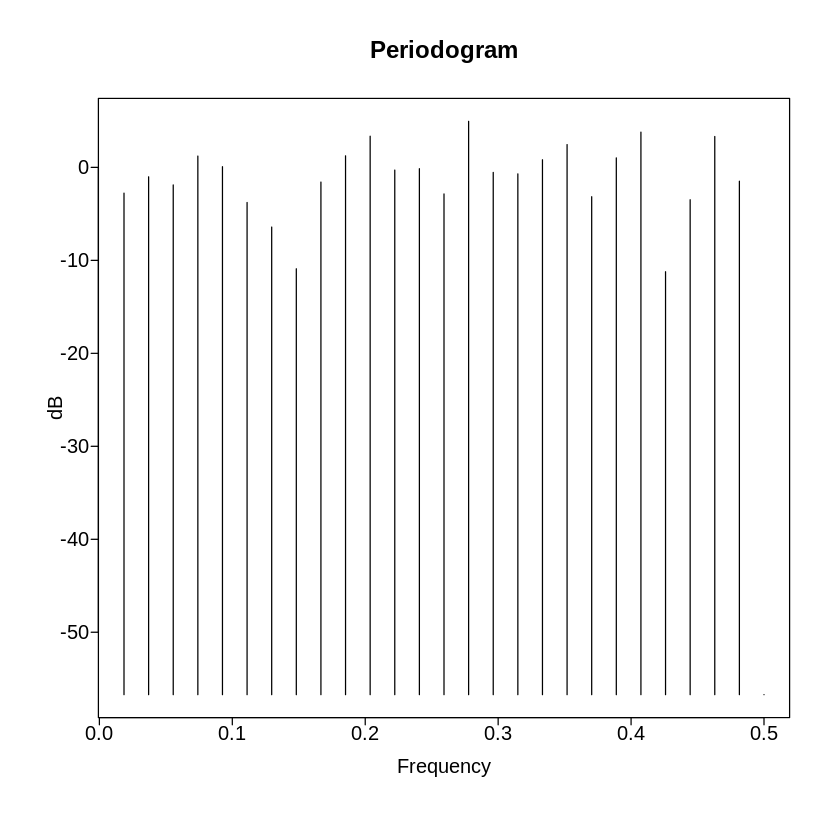

In [73]:
mei_df_filt <- subset(mei.df, YEAR >= 1964 & YEAR < 2018)
keep <- c("YEAR", "DECJAN")
mei_df_filt <- mei_df_filt[keep]

mei_filt_nino <- subset(mei_df_filt, DECJAN >= 0.5)
mei_filt_nino.ts <- ts(mei_df_filt$DECJAN, start = c(1950, 1), frequency = 12)

periodogram_mei_nino <- period.wge(mei_filt_nino.ts, dbcalc = TRUE, plot = TRUE)
cat('The dominant MEI El Niño frequency is: ', which.max(periodogram_mei_nino$pgram)/1000)
# 0.008

In [74]:
mei_filt_verystrong <- subset(mei_df_filt, DECJAN >= 2)
mei_filt_strong <- subset(mei_df_filt, DECJAN < 2 & DECJAN >= 1.5)
mei_filt_moderate <- subset(mei_df_filt, DECJAN < 1.5 & DECJAN >= 1)
mei_filt_weak <- subset(mei_df_filt, DECJAN < 1 & DECJAN >= 0.5)

In [75]:
very_strong_year_mei = c()
for (year in mei_filt_verystrong$YEAR){
  very_strong_year_mei <- append(very_strong_year_mei, year)
}

strong_year_mei = c()
for (year in mei_filt_strong$YEAR){
  strong_year_mei <- append(strong_year_mei, year)
}

moderate_year_mei = c()
for (year in mei_filt_moderate$YEAR){
  moderate_year_mei <- append(moderate_year_mei, year)
}

weak_year_mei = c()
for (year in mei_filt_weak$YEAR){
  weak_year_mei <- append(weak_year_mei, year)
}

# Results 

### Reproduced Figure 1 from Original Paper Image 1: PAD

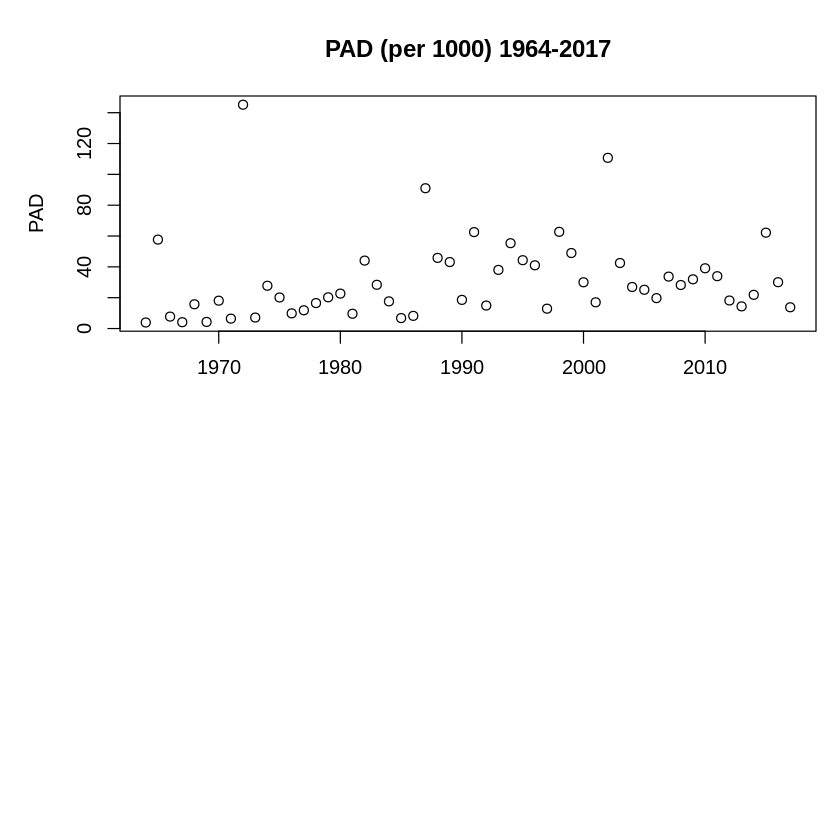

In [76]:
par(mar = c(.2,5,4,1))
par(fig = c(0,1,.6,1))
plot(all_years, 
    pad_1000, 
    main = "PAD (per 1000) 1964-2017", 
    xlab = 'Year', 
    ylab = 'PAD'
    )

### Reproduced Figure 1 from Original Paper Image 2: ONI

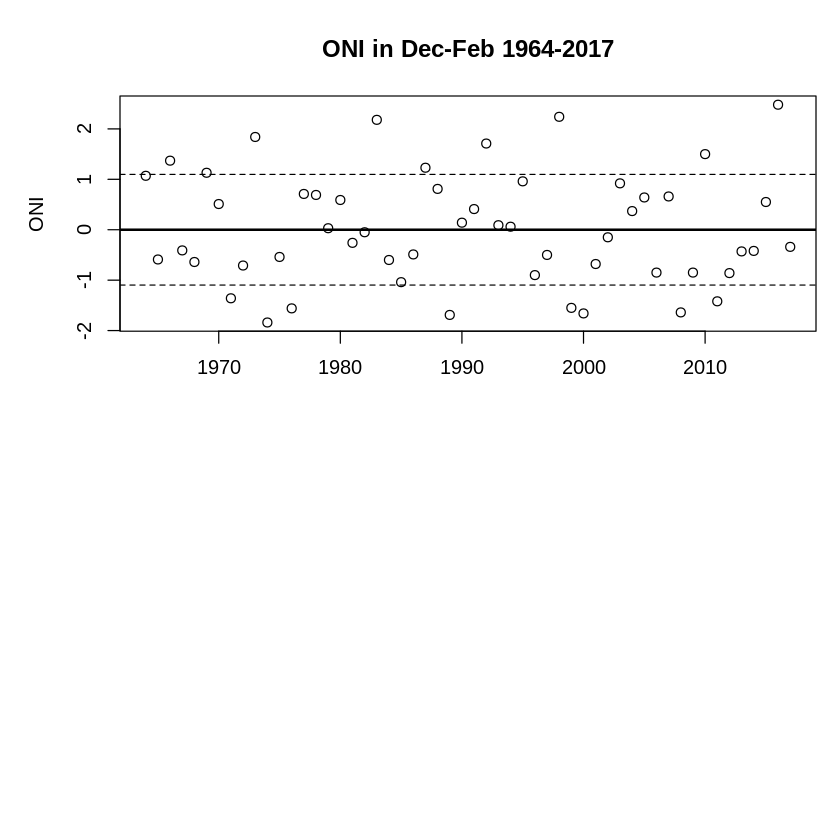

In [77]:
# set the year range as a vector
year_range_oni <- c(1964:2017)

# subset the data frame to just the years/time we want
oni_filt <- subset(oni.df, SEAS == 'DJF')
oni_filt <- subset(oni_filt, YR >= 1964 & YR < 2018)

# turn the ANOM column into a vector
ANOM_vector <- oni_filt[,4]

# Find the standard deviation
sd_pos = sd(ANOM_vector)
sd_neg = -sd(ANOM_vector)

# plot the graph
par(mar = c(.2,5,4,1))
par(fig = c(0,1,.6,1))
plot(year_range_oni, 
    ANOM_vector, 
    main = "ONI in Dec-Feb 1964-2017", 
    xlab = 'Year', 
    ylab = 'ONI')
abline(h = 0, lty = 1, lwd = 2)
abline(h = sd_pos, lty = 2)
abline(h = sd_neg, lty = 2)

### Reproduced Figure 1 from Original Paper Image 3: MEI

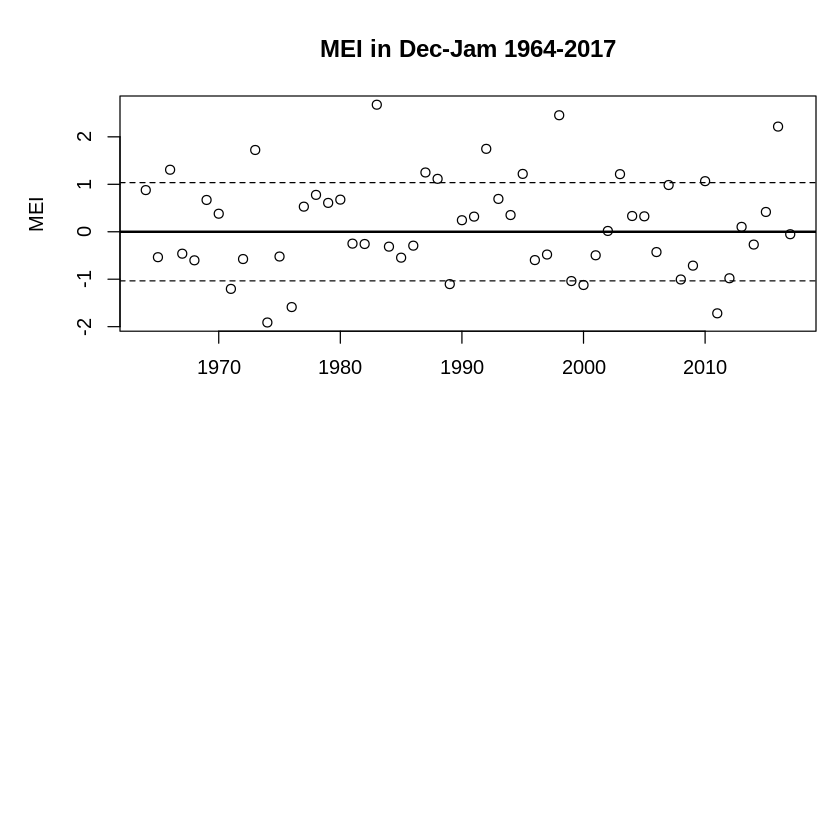

In [78]:
# set the year range as a vector
year_range_mei <- c(1964:2017)

# DECJAN

mei_df_filt <- subset(mei.df, YEAR >= 1964 & YEAR < 2018)
keep <- c("YEAR", "DECJAN")
mei_df_filt <- mei_df_filt[keep]


# # turn the DecJan column into a vector
DecJan_vector <- mei_df_filt[,2]

# Find the standard deviation
sd_pos = sd(DecJan_vector)
sd_neg = -sd(DecJan_vector)

# plot the graph
par(mar = c(.2,5,4,1))
par(fig = c(0,1,.6,1))
plot(year_range_mei, 
    DecJan_vector, 
    main = "MEI in Dec-Jam 1964-2017", 
    xlab = 'Year', 
    ylab = 'MEI')
abline(h = 0, lty = 1, lwd = 2)
abline(h = sd_pos, lty = 2)
abline(h = sd_neg, lty = 2)

### 1.1 ONI Visual

The Time Realization shows an aperiodic tendency.

From the Periodogram we find a dominant frequency of 0.02

The Autocorrelation plot shows an alternation between positive and negative values. This means that there can be either a positive or negative correlation beteen one year and the next years data.

- $\hat \rho_0 = 1.000$
- $\hat \rho_1 = -0.097$

A smooth spectrum graph suggests aperiodic behavior. The peak at 0.02 suggests aperiodic behavior, or an extremely long period.


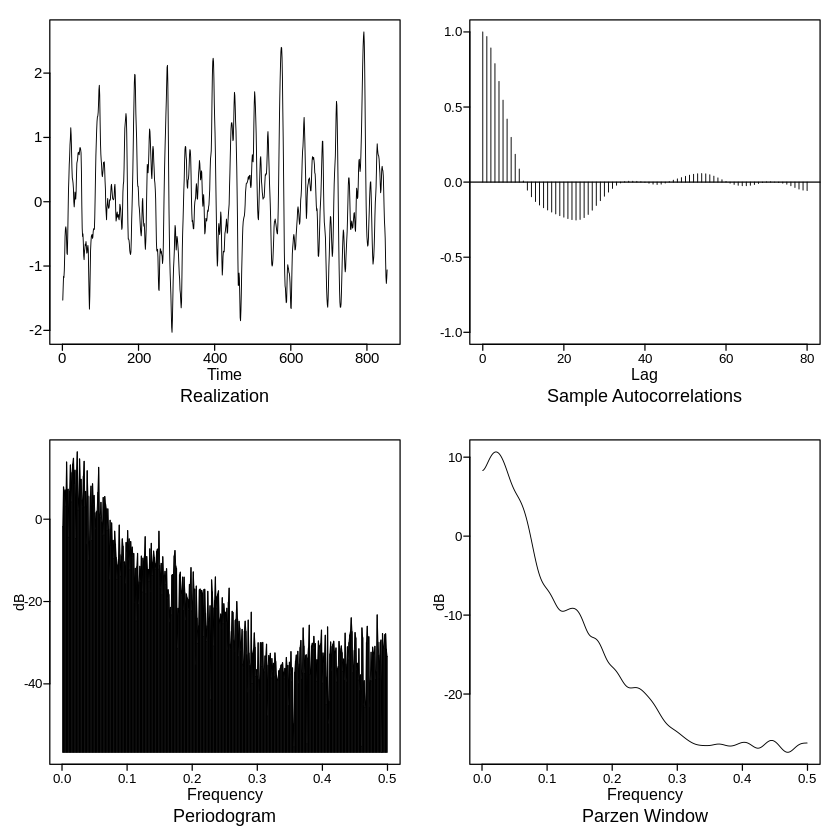

In [79]:
oni.data <- plotts.sample.wge(oni.ts, lag.max = 80)

### 1.2 MEI Visual

The Time Realization shows an aperiodic tendency.

From the Periodogram we find a dominant frequency of 0.019

The Autocorrelation plot shows an alternation between positive and negative values. This means that there can be either a positive or negative correlation beteen one year and the next years data.

- $\hat \rho_0 = 1.000$
- $\hat \rho_1 = 0.068$

The Smooth spectrum graph suggests aperiodic behavior. A peak at 0.019 suggests either aperiodic behavior or an extremely long period.


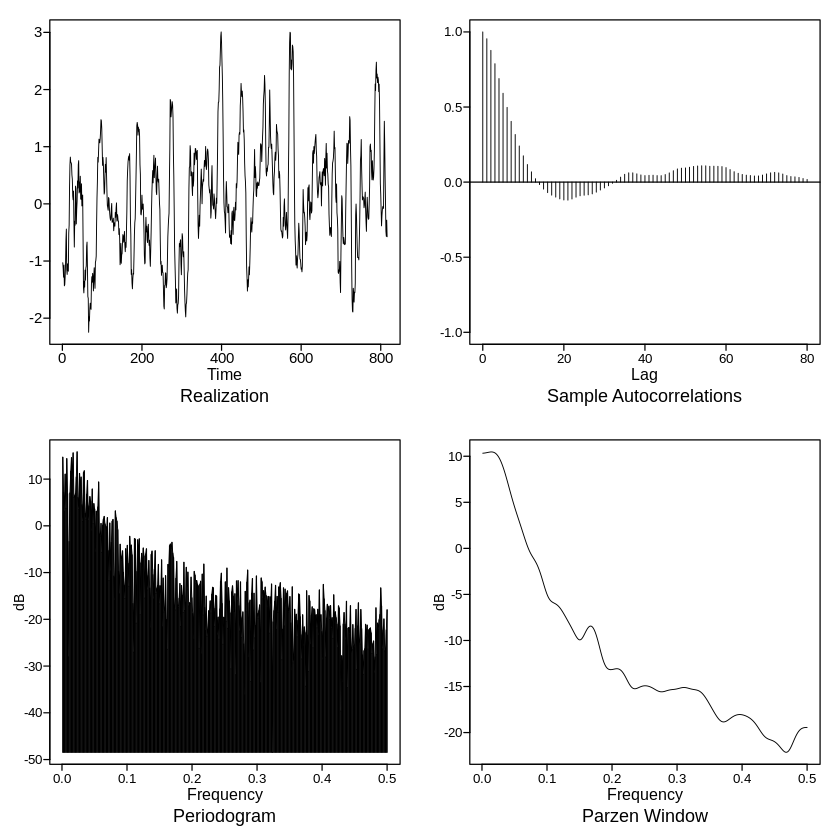

In [80]:
mei.data <- plotts.sample.wge(mei.ts, lag.max = 80)

### 1.3 PAD per 1000 Visual

The Time Realization shows an aperiodic tendency.

From the Periodogram we find a dominant frequency of 0.025

The Autocorrelation plot shows an alternation between positive and negative values. This means that there can be either a positive or negative correlation beteen one year and the next years data.

- $\hat \rho_0 = 1.000$ 
- $\hat \rho_1 = -0.022$

Theres is strong peak at ~0.45. There appears to be a recurring spike in frequency approximately at i/10 for i = {5, 15, 25, 45} which may indicate periodic behavior.


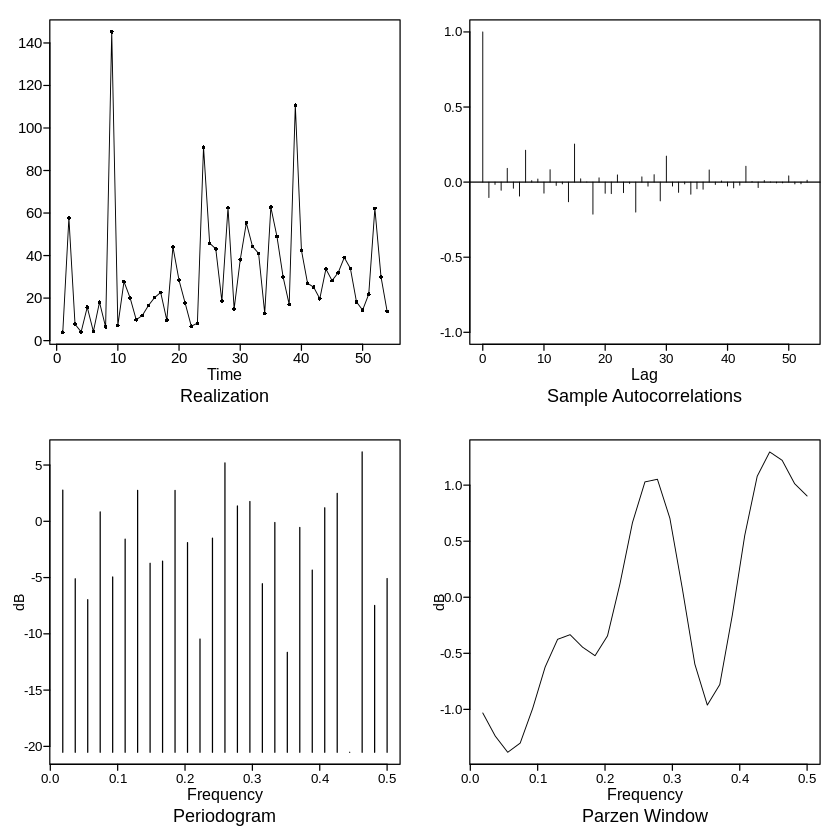

In [81]:
pad.data <- plotts.sample.wge(pad_1000.ts, lag.max = 80)

### ONI and MEI Comparison

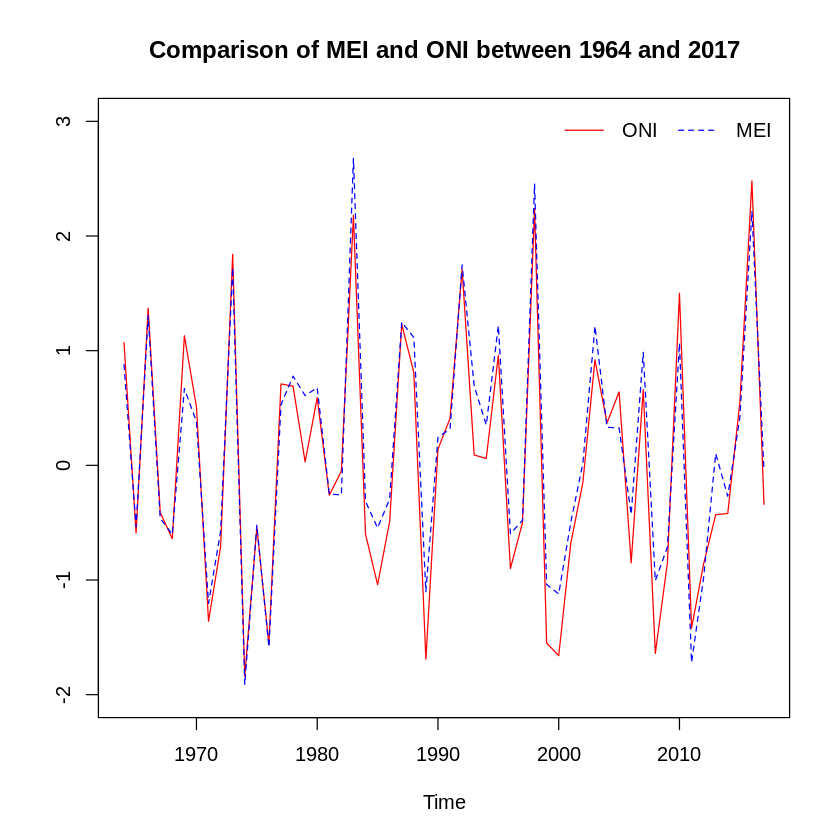

In [82]:
plot(
  year_range_oni, 
  ANOM_vector, 
  main = 'Comparison of MEI and ONI between 1964 and 2017',
  ylim = c(-2, 3), 
  type = "l", 
  col = "red", 
  lwd = 1, 
  lty = 1, 
  xlab = "Time", 
  ylab = NA
)

lines (
  year_range_oni, 
  DecJan_vector,
  type = "l",
  col = "blue",
  lwd = 1,
  lty = 2,
)

legend(
  "topright", 
  inset=0.01, 
  col=c("red","blue"), 
  lty=c(1,2), 
  lwd=c(1,1), 
  legend = c(
    'ONI',
    'MEI'), 
  bg="white",
  box.col="white",
  horiz=TRUE
)

This graph, supported by data analysis, show El Niño years based on ONI and MEI indictors.

#### ONI and MEI El Niño Years:

##### ONI El Niño Years:

In [83]:
cat('The dominant ONI El Niño frequency based on ONI is: ', which.max(periodogram_oni_nino$pgram)/1000, '\n')
cat('The following years exhibit very strong El Niño patterns: ', oni_very_strong_year, '\n')
cat('The following years exhibit strong El Niño patterns: ', oni_strong_year, '\n')
cat('The following years exhibit moderate El Niño patterns: ', oni_moderate_year, '\n')
cat('The following years exhibit weak El Niño patterns: ', oni_weak_year)

The dominant ONI El Niño frequency based on ONI is:  0.009 
The following years exhibit very strong El Niño patterns:  1983 1998 2016 
The following years exhibit strong El Niño patterns:  1973 1992 2010 
The following years exhibit moderate El Niño patterns:  1964 1966 1969 1987 
The following years exhibit weak El Niño patterns:  1970 1977 1978 1980 1988 1995 2003 2005 2007 2015

##### MEI El Niño Years:

In [84]:
cat('The dominant MEI El Niño frequency is: ', which.max(periodogram_mei_nino$pgram)/1000, '\n')
cat('The following years exhibit very strong El Niño patterns: ', very_strong_year_mei, '\n')
cat('The following years exhibit strong El Niño patterns: ', strong_year_mei, '\n')
cat('The following years exhibit moderate El Niño patterns: ', moderate_year_mei, '\n')
cat('The following years exhibit weak El Niño patterns: ', weak_year_mei)

The dominant MEI El Niño frequency is:  0.015 
The following years exhibit very strong El Niño patterns:  1983 1998 2016 
The following years exhibit strong El Niño patterns:  1973 1992 
The following years exhibit moderate El Niño patterns:  1966 1987 1988 1995 2003 2010 
The following years exhibit weak El Niño patterns:  1964 1969 1977 1978 1979 1980 1993 2007

## 1.4 Nile Flow Rates Visual

The Time Realization shows an aperiodic tendency.

From the Periodogram we find a dominant frequency of 0.001

The Autocorrelation plot shows an both positive and negative values. This means that there can be either a positive or negative correlation beteen one year and the next years data.

- $\hat \rho_0 = 1.000$ 
- $\hat \rho_1 = 0.213$

A strong peak in frequency at 0 and weaker peaks at 0.25 and 0.35 may indicate underlying periodic behavior. 


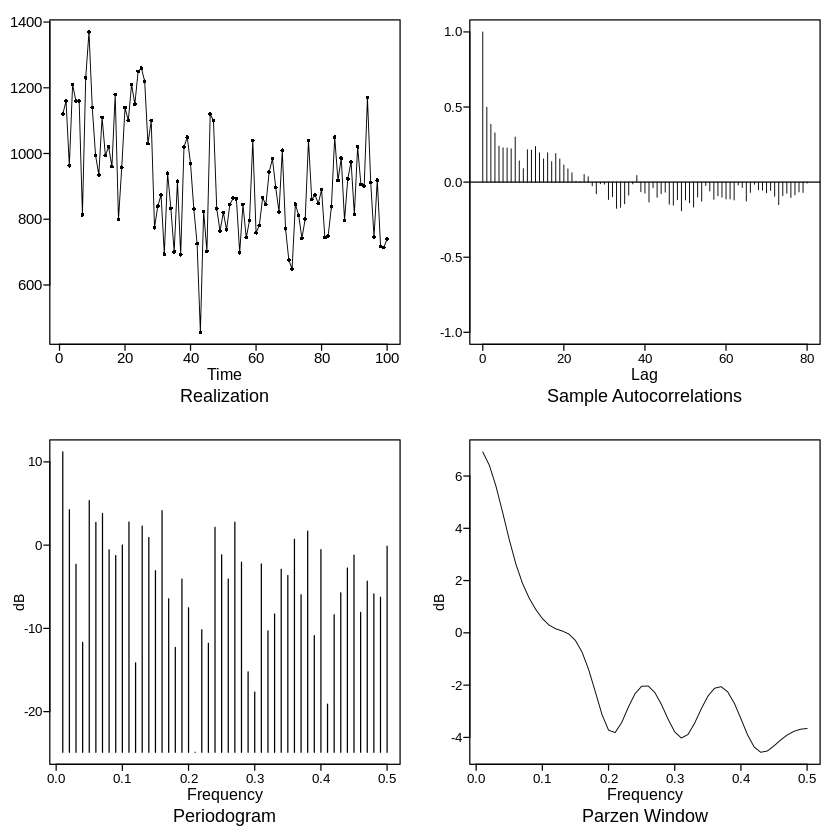

In [85]:
nile.data <- plotts.sample.wge(nile.ts, lag.max = 80)

# Discussion and Conclusion

In this lab, data from the National Oceanic and Atmospheric Administration, EM-DAT, and World Bank was used to replicate the analysis done by Holly Ching Yu Lam in the paper “Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle”. Utilizing the R programming language the data was imported into data frames so it could be filtered and analyzed. By filtering the data frames, ONI and MEI values could be filtered to only include El Niño years. Then the years in which an El Niño year occurred could be extracted. An additional level of analysis could be added to forecast future El Niño years. By breaking down the data into a test and training set, we can create a program that will allow us to predict what years in the future will be El Niño years. By utilizing R function – such time series : ts(), summary plots : plotts.sample.wge() and periodograms: period.wge() – important trends in the data became apparent. The dominant frequencies were able to be identified, as well as periodic tendencies that may not have been apparent after a visual inspection of the time series realization. When the MEI and ONI were plotted together, between 1964 and 2017, it added additional confirmation for El Niño years. While the MEI and ONI may have been slightly different in a given year, they were highly correlated. 

The biggest challenge for me was the transition to R from Python. My previous coding experience has all been in Python so it was frustrating to know exactly how something should work, but not know the correct syntax to make it work. In order to overcome these challenges, I asked friends and classmates for syntax help and reached out to Professor Davis when needed. While at times it was difficult, I feel like this lab has greatly increased my familiarity with R, helped me to expand my knowledge, and pushed me to compete with myself to find more efficient ways to write the code.

# References 

**Text Citations**

Lam, H. C., Haines, A., McGregor, G., Chan, E. Y., &amp; Hajat, S. (2019). Time-Series study of associations between rates of people affected by disasters and the El Niño Southern OSCILLATION (ENSO) CYCLE. International Journal of Environmental Research and Public Health, 16(17), 3146. doi:10.3390/ijerph16173146

**Data Citations**

Database: Em-dat. (n.d.). Retrieved March 23, 2021, from https://www.emdat.be/database

(Database: Em-dat)

Climate prediction Center. (n.d.). Retrieved March 06, 2021, from https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

(Climate Prediction Center)

MEI timeseries FROM Dec/jan 1940/50 up to the present. (n.d.). Retrieved March 06, 2021, from https://psl.noaa.gov/enso/mei.old/table.html

(MEI timeseries FROM Dec/jan 1940/50 up to the present)


Population, total. (n.d.). Retrieved March 06, 2021, from https://data.worldbank.org/indicator/SP.POP.TOTL

(Population, total)


Kames Durbin and Siem Jan Koopman (2001). Time Series Analysis by State Space Methods. Oxford University Press, from http://www.ssfpack.com/DKbook.html

